## Audio Analysis: 

Michaela, Damone and Eva need to pinpoint the place where a certain bird population is most dense. This is a critical point in their journey, and the clock is ticking. Goal is to analyze these audio files and identify which areas of the forest have the greatest density of capuchinbirds. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/curlew-sound-3.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/cricket-sounds-for-sleep-48.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/sparrow-sound-effect-39.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/crow-cawing-sound-effect-9.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/cricket-sounds-for-sleep-5.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/rain-thunder-and-crickets-sound-effect-4.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/crickets-chirping-crickets-sound-0.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/cricket-sounds-for-sleep-29.wav
/kaggle/input/z

In [2]:
os.listdir('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing')

['Parsed_Not_Capuchinbird_Clips',
 'Forest Recordings',
 'Parsed_Capuchinbird_Clips']

### 1.1 Load Dependencies

In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

### 2. Build Data Loading Function

#### 2.1 Define Paths to Files

In [4]:
# Processing one specific example
capuchin_file = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
not_capuchin_file = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Not_Capuchinbird_Clips', 'cricket-sounds-for-sleep-5.wav')

#### 2.2 Build Dataloading Function

In [8]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000Hz  - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in = sample_rate, rate_out = 16000)
    return wav

#### 2.3 Plot Wave

In [9]:
wave = load_wav_16k_mono(capuchin_file)
nwave = load_wav_16k_mono(not_capuchin_file)

2022-11-04 08:25:31.473834: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-04 08:25:31.637659: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA
2022-11-04 08:25:31.883551: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


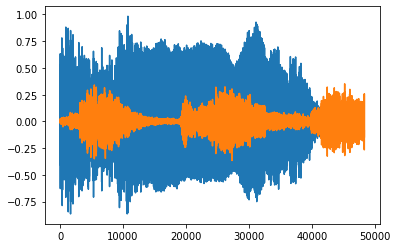

In [10]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

### 3. Create TensorFlow Dataset

#### 3.1 Define Paths to Positive and Negative Data

In [11]:
POS = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', 'Parsed_Not_Capuchinbird_Clips')

#### 3.2 Create TensorFlow Datasets

In [14]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

#### 3.3 Add labels and combine positive and negative samples

In [17]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

### 4. Determine Average Length of a Capuchin Call

#### 4.1 Calculate Wave Cycle Length

In [23]:
lengths = []
for file in os.listdir(os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [24]:
lengths

[64000,
 48000,
 48000,
 56000,
 56000,
 64000,
 48000,
 56000,
 64000,
 56000,
 55999,
 72000,
 48000,
 56000,
 56000,
 40000,
 40000,
 56000,
 56000,
 64000,
 32000,
 56000,
 64000,
 40000,
 48000,
 64000,
 56000,
 40000,
 64000,
 48000,
 56000,
 64000,
 56000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 72000,
 48000,
 48000,
 64000,
 39999,
 64000,
 56000,
 64000,
 56000,
 40000,
 64000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,
 72000,
 40000,
 48000,
 40000,
 48000,
 64000,
 48000,
 64000,
 56000,
 48000,
 64000,
 48000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 40000,
 48000,
 64000,
 56000,
 40000,
 56000,
 32000,
 56000,
 48000,
 64000,
 64000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 64000,
 56000,
 48000,
 48000,
 64000,
 40000,
 56000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 72000,
 56000,
 56000,
 48000,
 40000,
 48000,
 64000,
 56000,
 64000,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,


#### 4.2 Calculate Mean, Min and Max

In [25]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [26]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [27]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

### 5. Build Proprocessing Function to Convert to Spectrogram

#### 5.1 Build Preprocessing Function

In [28]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

#### 5.2 Test Out the Function and Viz the Spectrogram

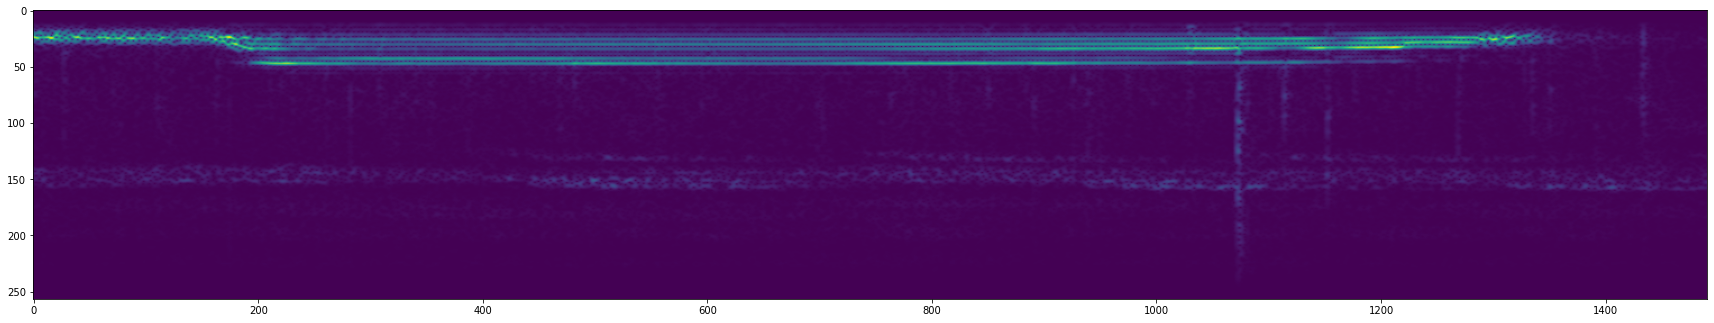

In [35]:
# Positive example
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

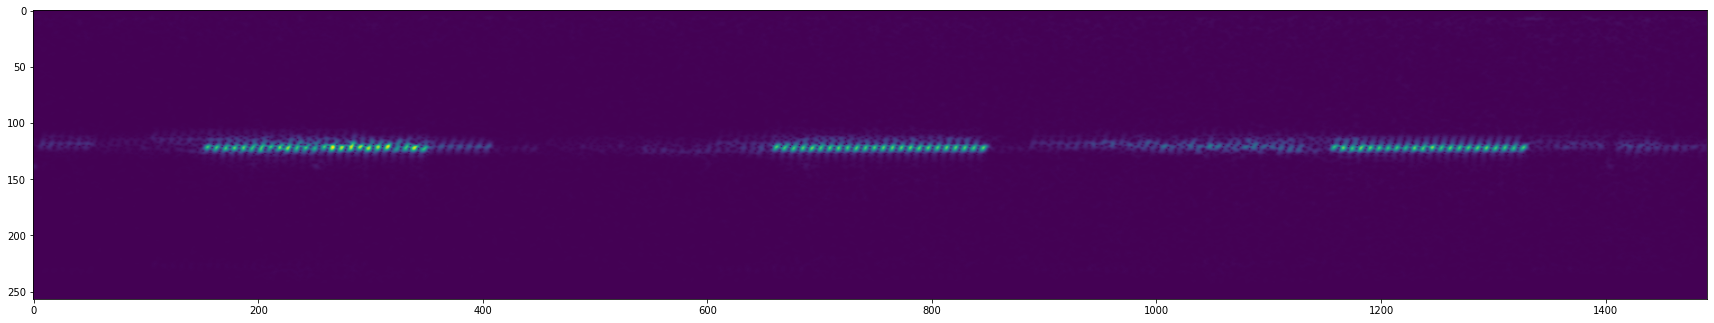

In [36]:
# Negative example
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

### 6. Create Training and Testing Partitions

#### 6.1 Create a Tensorflow Data Pipeline

In [37]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

#### 6.2 Split into Training and Testing Partitions

In [40]:
train = data.take(36)
test = data.skip(36).take(15)

#### 6.3 Test One Batch

In [41]:
samples, labels = train.as_numpy_iterator().next()
samples.shape

2022-11-04 10:05:04.126559: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 365 of 1000
2022-11-04 10:05:14.131961: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 714 of 1000
2022-11-04 10:05:16.869984: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


(16, 1491, 257, 1)

In [42]:
labels

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
      dtype=float32)

### 7. Build Deep Learning Model

#### 7.1 Load Tensorflow Dependencies

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

#### 7.2 Build Sequential Model, Compile and View Summary

In [44]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257, 1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1489, 255, 16)     160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1487, 253, 16)     2320      
_________________________________________________________________
flatten (Flatten)            (None, 6019376)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               770480256 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


#### 7.3 Fit Model, View Loss and KPI Plots

In [47]:
hist = model.fit(train, epochs=4, validation_data = test)

Epoch 1/4
36/36 [==============================] - 152s 4s/step - loss: 6.5151 - recall: 0.8961 - precision: 0.8364 - val_loss: 1.4240 - val_recall: 0.9322 - val_precision: 0.9821
Epoch 2/4
36/36 [==============================] - 146s 4s/step - loss: 0.6576 - recall: 0.9551 - precision: 0.9371 - val_loss: 0.0516 - val_recall: 0.9577 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 147s 4s/step - loss: 0.0193 - recall: 0.9872 - precision: 1.0000 - val_loss: 2.7692e-04 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/4
36/36 [==============================] - 149s 4s/step - loss: 0.0061 - recall: 0.9937 - precision: 1.0000 - val_loss: 0.0023 - val_recall: 1.0000 - val_precision: 1.0000


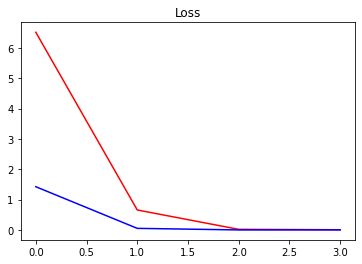

In [48]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

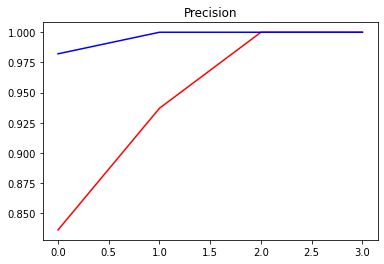

In [49]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

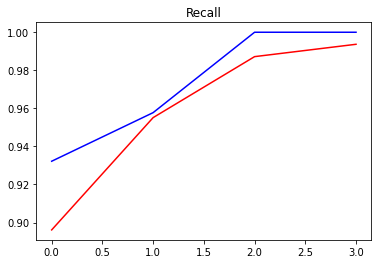

In [50]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

### 8. Make a Prediction on a Single Clip

#### 8.1 Get One Batch and Make a Prediction

In [59]:
X_test, y_test = test.as_numpy_iterator().next()

In [60]:
yhat = model.predict(X_test)

In [61]:
yhat

array([[1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.34756176e-17],
       [1.14613831e-30],
       [0.00000000e+00],
       [1.00000000e+00],
       [7.19738125e-14],
       [8.63548921e-05],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.92501640e-24],
       [0.00000000e+00],
       [4.16696072e-03]], dtype=float32)

#### 8.2 Convert Logits to Classes

In [62]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [63]:
yhat, tf.math.reduce_sum(yhat)

([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 <tf.Tensor: shape=(), dtype=int32, numpy=5>)

In [64]:
tf.math.reduce_sum(y_test)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [65]:
y_test.astype(int)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

### 9. Build Forest Parsing Functions

#### 9.1 Load up MP3s

In [66]:
def load_mp3_16k_mono(filename):
    '''Load a WAV file, convert it to a float tensor, resample to 16 KHz single- ''' 
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16KHz
    wav = tfio.audio.resample(tensor, rate_in = sample_rate, rate_out=16000)
    return wav

In [67]:
mp3 = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', 'Forest Recordings', 'recording_00.mp3')

In [68]:
wav = load_mp3_16k_mono(mp3)
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [69]:
samples, index = audio_slices.as_numpy_iterator().next()

In [71]:
samples.shape, len(audio_slices)

((1, 48000), 60)

#### 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [72]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

#### 9.3 Convert Longer Clips into Windows and Make Predictions

In [73]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [76]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

#### 9.4 Group Consecutive Detections

In [77]:
len(yhat)

60

In [78]:
from itertools import groupby

yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [79]:
calls

5

### 10. Make Predictions

#### 10.1 Loop over all recordings and make predictions

In [80]:
results = {}
for file in os.listdir(os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', 'Forest Recordings')):
    FILEPATH = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', 'Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    results[file] = yhat

In [81]:
results

{'recording_76.mp3': array([[1.3282711e-06],
        [2.9251193e-12],
        [3.4154851e-05],
        [1.4650822e-04],
        [7.2438612e-05],
        [6.2867854e-05],
        [1.8832088e-04],
        [1.7771125e-04],
        [2.0922233e-05],
        [5.6618452e-04],
        [4.4864416e-04],
        [8.1279874e-04],
        [3.5846233e-04],
        [1.6454875e-02],
        [5.6271464e-02],
        [4.7367811e-04],
        [3.9586425e-04],
        [2.2703409e-04],
        [8.7345443e-06],
        [2.7893361e-13],
        [1.4039749e-12],
        [1.2670568e-14],
        [1.4745494e-13],
        [4.3886837e-25],
        [4.3993394e-27],
        [0.0000000e+00],
        [1.2602292e-28],
        [3.8307976e-26],
        [4.6682402e-24],
        [1.5240499e-23],
        [0.0000000e+00],
        [2.7473846e-25],
        [6.3337665e-20],
        [1.5179511e-24],
        [3.9284520e-20],
        [3.1477554e-24],
        [1.3890859e-26],
        [1.2413150e-30],
        [2.3615873e-28],
     

#### 10.2 Convert Predictions into Classes

In [82]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_76.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_62.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_48.mp3': [0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_44.mp3': [0,
  0,
  0,
  

#### 10.3 Group Consecutive Detections

In [84]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)])
postprocessed

{'recording_76.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'recording_62.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'recording_48.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 'recording_44.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 'recording_45.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=3>,
 'recording_06.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=7>,
 'recording_43.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_68.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 'recording_95.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_17.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=16>,
 'recording_65.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_74.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'recording_10.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_49.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'recording_15.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 'recordi

### 11. Export Results

In [85]:
import csv

In [87]:
with open('capuchinbird_results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])